**전국 반려동물 시설 분석**
***

## 데이터 분석과 시각화를 위한 설정

In [17]:
import pandas as pd                # 데이터 분석을 위해 pandas
import numpy as np                 # 수치계산을 위해 numpy
import matplotlib.pyplot as plt    # 시각화를 위해 mapplotlib, seaborn를 불러온다.
import seaborn as sns
import folium                      # 지도 시각화를 위한 라이브러리
import json


In [18]:
# 한글 설정 & 마이너스 표시
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

## 파일 열기
공공데이터포털 : 한국문화정보원_전국 반려동물 동반 가능 문화시설 위치 데이터

In [19]:
# CSV 파일 읽기
df = pd.read_csv('data/data.csv', encoding='cp949')

## 데이터 전처리

In [ ]:
# df.info()

In [20]:
# 결측치확인
df.isnull().sum()

시설명                 0
카테고리1               0
카테고리2               0
카테고리3               0
시도 명칭               0
시군구 명칭            145
법정읍면동명칭            44
리 명칭            19134
번지                 57
도로명 이름            306
건물 번호             306
위도                  0
경도                  0
우편번호               72
도로명주소             306
지번주소                0
전화번호                0
홈페이지                0
휴무일                 0
운영시간                0
주차 가능여부             0
입장(이용료)가격 정보        0
반려동물 동반 가능정보        0
반려동물 전용 정보          0
입장 가능 동물 크기         0
반려동물 제한사항           0
장소(실내) 여부           0
장소(실외)여부            0
기본 정보_장소설명          0
애견 동반 추가 요금         0
최종작성일               0
dtype: int64

### 데이터 확인

In [21]:
df.columns

Index(['시설명', '카테고리1', '카테고리2', '카테고리3', '시도 명칭', '시군구 명칭', '법정읍면동명칭', '리 명칭',
       '번지', '도로명 이름', '건물 번호', '위도', '경도', '우편번호', '도로명주소', '지번주소', '전화번호',
       '홈페이지', '휴무일', '운영시간', '주차 가능여부', '입장(이용료)가격 정보', '반려동물 동반 가능정보',
       '반려동물 전용 정보', '입장 가능 동물 크기', '반려동물 제한사항', '장소(실내) 여부', '장소(실외)여부',
       '기본 정보_장소설명', '애견 동반 추가 요금', '최종작성일'],
      dtype='object')

In [22]:
df['카테고리3'].unique()

array(['동물약국', '미술관', '카페', '동물병원', '반려동물용품', '미용', '문예회관', '펜션', '식당',
       '여행지', '위탁관리', '박물관', '호텔'], dtype=object)

In [23]:
df['시도 명칭'].unique()

array(['경기도', '전라남도', '서울특별시', '인천광역시', '경상북도', '대구광역시', '세종특별자치시',
       '전라북도', '경상남도', '강원도', '부산광역시', '광주광역시', '대전광역시', '충청북도',
       '제주특별자치도', '충청남도', '울산광역시'], dtype=object)

In [24]:
# df['주차 가능여부'].unique()

In [25]:
# df['반려동물 동반 가능정보'].unique()

In [26]:
df['반려동물 전용 정보'].unique()

array(['해당없음', '반려동물 전용'], dtype=object)

In [27]:
# df['애견 동반 추가 요금'].unique()

In [28]:
# df['입장 가능 동물 크기'].unique()

In [29]:
# df['반려동물 제한사항'].unique()

In [30]:
# df['카테고리1'].unique()

In [31]:
# df['카테고리2'].unique()

### 동반 가능한 곳만 데이터 추려내기

In [32]:
df.shape

(23929, 31)

In [33]:
filter = df['반려동물 동반 가능정보'] == '동반가능'
df = df[filter]
df.shape

(21139, 31)

### 컬럼명 변경하고 사용하지 않는 데이터 제거

In [34]:
# 필요한 데이터만 가져올 컬럼명
columns = ['시설명', '시도 명칭', '시군구 명칭', '카테고리3', '위도', '경도', '도로명주소',
            '지번주소', '전화번호', '홈페이지', '휴무일', '운영시간',
            '주차 가능여부', '입장(이용료)가격 정보', '입장 가능 동물 크기',
            '반려동물 제한사항', '기본 정보_장소설명', '애견 동반 추가 요금']
# columns

In [35]:
# 필요한 데이터만 가져오기
df = df[columns].copy()

In [36]:
# 새로운 컬럼 이름
col_names = ['시설명', '행정구역', '시군구', '시설분류', '위도', '경도', '도로명주소',
             '지번주소', '전화번호', '홈페이지', '휴무일', '운영시간',
            '주차가능여부', '이용료정보', '크기제한', '기타제한사항',
            '장소요약', '동반시추가요금']
col_names

['시설명',
 '행정구역',
 '시군구',
 '시설분류',
 '위도',
 '경도',
 '도로명주소',
 '지번주소',
 '전화번호',
 '홈페이지',
 '휴무일',
 '운영시간',
 '주차가능여부',
 '이용료정보',
 '크기제한',
 '기타제한사항',
 '장소요약',
 '동반시추가요금']

In [37]:
# 새로운 컬럼이름을 기존 컬럼에 덮어씌우기
df.columns = col_names

In [38]:
df.head(1)

,시설명,행정구역,시군구,시설분류,위도,경도,도로명주소,지번주소,전화번호,홈페이지,휴무일,운영시간,주차가능여부,이용료정보,크기제한,기타제한사항,장소요약,동반시추가요금
0,1004 약국,경기도,고양시 덕양구,동물약국,37.644543,126.886336,경기도 고양시 덕양구 동세로 19,경기도 고양시 덕양구 동산동 352-1,02-381-5052,정보없음,"매주 토, 일, 법정공휴일",월~금 09:00~18:00,주차가능,변동,모두 가능,제한사항 없음,동물약국,없음


In [39]:
# df['행정구역'].describe()

In [40]:
# df['시설분류'].describe()

In [41]:
df['시설분류'].unique()

array(['동물약국', '카페', '동물병원', '반려동물용품', '미용', '문예회관', '펜션', '식당', '여행지',
       '위탁관리', '박물관', '미술관', '호텔'], dtype=object)

In [42]:
# df.dtypes

### 중복확인

In [46]:
df.duplicated().sum()

0

### 시설분류 단순화

In [44]:
df['시설분류'].unique()

array(['동물약국', '카페', '동물병원', '반려동물용품', '미용', '문예회관', '펜션', '식당', '여행지',
       '위탁관리', '박물관', '미술관', '호텔'], dtype=object)

In [47]:
df['시설분류'].value_counts()

시설분류
동물약국      8440
동물병원      4486
반려동물용품    3821
미용        2004
여행지        872
카페         795
펜션         407
박물관        215
위탁관리        61
미술관         19
식당          14
문예회관         4
호텔           1
Name: count, dtype: int64

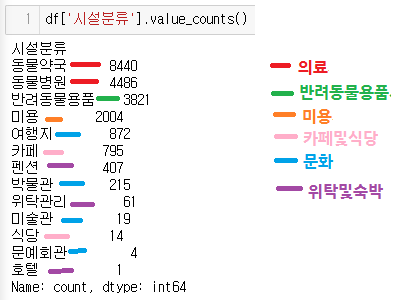

In [48]:
# 의료시설은 많아서 안합침
# filt1 = df['시설분류'].isin(['동물약국', '동물병원'])
# df.loc[filt1, '시설분류'] = '의료'
filt2 = df['시설분류'].isin(['여행지', '박물관', '미술관', '문예회관'])
df.loc[filt2, '시설분류'] = '문화'
filt3 = df['시설분류'].isin(['펜션', '위탁관리', '호텔'])
df.loc[filt3, '시설분류'] = '위탁및숙박'
filt4 = df['시설분류'].isin(['카페', '식당'])
df.loc[filt4, '시설분류'] = '카페및식당'

# 시설분류 단순화 최종 7개
# => 동물약국, 동물병원, 반려동물용품, 미용, 카페및식당, 문화, 위탁및숙박

## 결측치 확인

### 결측치 합계

In [49]:
df.isnull().sum()

시설명          0
행정구역         0
시군구        134
시설분류         0
위도           0
경도           0
도로명주소      306
지번주소         0
전화번호         0
홈페이지         0
휴무일          0
운영시간         0
주차가능여부       0
이용료정보        0
크기제한         0
기타제한사항       0
장소요약         0
동반시추가요금      0
dtype: int64

In [50]:
# df.head(1)

### 세종특별자치시 세종시로 넣기
- GeoJSON으로 지도 그릴 때 '시군구' 명칭이 있어야함
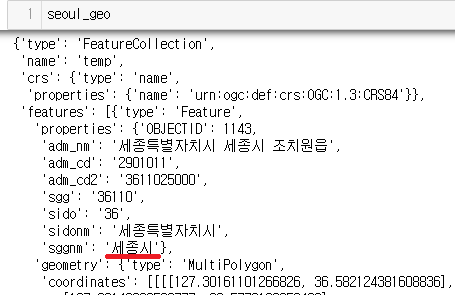

In [51]:
filt = df['행정구역'] == '세종특별자치시'
df.loc[filt, '시군구'] = '세종시'

In [52]:
# 결측치 확인
df.isnull().sum()

시설명          0
행정구역         0
시군구          0
시설분류         0
위도           0
경도           0
도로명주소      306
지번주소         0
전화번호         0
홈페이지         0
휴무일          0
운영시간         0
주차가능여부       0
이용료정보        0
크기제한         0
기타제한사항       0
장소요약         0
동반시추가요금      0
dtype: int64

### 도로명주소 결측치값 '정보없음'으로 변경

In [53]:
df['도로명주소'] = df['도로명주소'].fillna('정보없음')

In [54]:
(df['도로명주소'] == '정보없음').sum()

306

In [55]:
#결측치 확인
df['도로명주소'].isnull().sum()

0

## 파일 저장하기

In [56]:
df.to_csv('data/animal_facility.csv', encoding='cp949', index=False)

## 파일 불러오기

In [57]:
df = pd.read_csv('data/animal_facility.csv', encoding='cp949')

In [58]:
df

,시설명,행정구역,시군구,시설분류,위도,경도,도로명주소,지번주소,전화번호,홈페이지,휴무일,운영시간,주차가능여부,이용료정보,크기제한,기타제한사항,장소요약,동반시추가요금
0,1004 약국,경기도,고양시 덕양구,동물약국,37.644543,126.886336,경기도 고양시 덕양구 동세로 19,경기도 고양시 덕양구 동산동 352-1,02-381-5052,정보없음,"매주 토, 일, 법정공휴일",월~금 09:00~18:00,주차가능,변동,모두 가능,제한사항 없음,동물약국,없음
1,100세건강약국,경기도,안양시 만안구,동물약국,37.407150,126.914837,경기도 안양시 만안구 안양로 408,경기도 안양시 만안구 안양동 856-4,031-465-1320,정보없음,"매주 일요일, 법정공휴일","월~금 09:00~21:00, 토 09:00~20:00",주차 불가,변동,모두 가능,제한사항 없음,동물약국,없음
2,100세약국,서울특별시,영등포구,동물약국,37.533260,126.903741,서울특별시 영등포구 양평로 24,서울특별시 영등포구 당산동6가 217-4,02-2678-8217,정보없음,"매주 일요일, 법정공휴일","월~금 08:30~21:00, 토 08:30~18:30",주차 불가,변동,모두 가능,제한사항 없음,동물약국,없음
3,100세약국,경기도,수원시 팔달구,동물약국,37.276272,127.030911,경기도 수원시 팔달구 경수대로 568,경기도 수원시 팔달구 인계동 942-4,031-239-4801,정보없음,"매주 일요일, 법정공휴일","월~금 09:00~19:00, 토 09:00~15:00",주차 불가,변동,모두 가능,제한사항 없음,동물약국,없음
4,100세약국,인천광역시,남동구,동물약국,37.462072,126.708644,인천광역시 남동구 남동대로 892,인천광역시 남동구 간석동 207-3,032-427-7585,정보없음,"매주 토, 일",월~금 08:30~22:00,주차 불가,변동,모두 가능,제한사항 없음,동물약국,없음
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21134,y동물병원,대구광역시,수성구,동물병원,35.842243,128.697815,대구광역시 수성구 달구벌대로 3116-1,대구광역시 수성구 시지동 258-14,053-791-7532,정보없음,매주 일요일,"월~금 09:30~19:00, 토 09:30~18:30",주차가능,변동,모두 가능,제한사항 없음,"일반동물병원, 일요일 야간 예약진료 가능",없음
21135,YOLO오시개,부산광역시,사상구,카페및식당,35.150589,129.012454,부산광역시 사상구 가야대로366번길 10,부산광역시 사상구 주례동 60-55,0507-1318-4786,http://instagram.com/yolo_playdogs,매주 화요일,수~월 13:00~20:00,주차가능,10000원,모두 가능,제한사항 없음,"애견카페, 호텔","2,000~6,000원"
21136,YS유통,경기도,파주시,반려동물용품,37.751561,126.844647,경기도 파주시 조리읍 장곡로 120-35,경기도 파주시 조리읍 장곡리 73-3,031-942-8377,http://www.irina.co.kr/,"매주 토, 일",월~금 10:00~17:00,주차가능,없음,모두 가능,제한사항 없음,"온라인쇼핑몰, 강아지용품, 반려동물 원목가구",없음
21137,ZOO동물병원,서울특별시,성북구,동물병원,37.601998,127.019541,서울특별시 성북구 정릉로 328,서울특별시 성북구 정릉동 16-162,02-914-5545,정보없음,매주 일요일,"월~금 10:00~19:00, 토 10:00~17:00",주차 불가,변동,모두 가능,제한사항 없음,일반동물병원,없음


***
***
***
↓↓↓↓↓↓↓↓↓↓↓↓↓ **여기서 부터는 테스트 지워도됨** ↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓

## 테스트

### 두개의 수치 비교 데이터

In [74]:
ulsan_df = df[df['행정구역'] == '울산광역시']

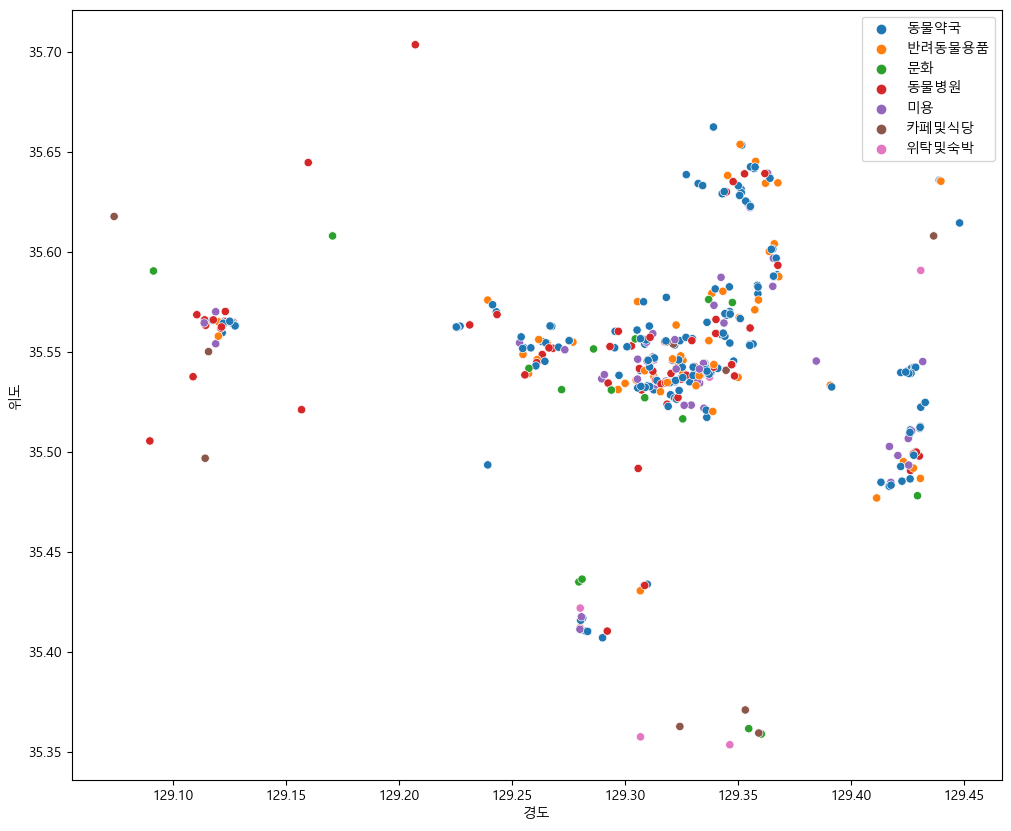

In [75]:
plt.figure(figsize=(12, 10)) # 도화지를 그리고(도화지사이즈)

sns.scatterplot(data=ulsan_df, x='경도', y='위도', hue='시설분류')
plt.legend(bbox_to_anchor=(1,1))

### json 파일 읽기

In [76]:
import json
import folium
import plotly.express as px

with open('data/geojson/TL_SCCO_CTPRVN.json', 'r', encoding='UTF-8') as f:
    seoul_geo = json.load(f)
    

In [77]:
# seoul_geo

In [78]:
seoul_geo["features"][0]["properties"]

{'CTPRVN_CD': '42', 'CTP_ENG_NM': 'Gangwon-do', 'CTP_KOR_NM': '강원도'}

### 울산광역시

In [61]:
ulsan_df = df[df['행정구역'] == '울산광역시']

In [62]:
lat = ulsan_df['위도'].mean()
lng = ulsan_df['경도'].mean()

In [63]:
# map = folium.Map(location=[lat, lng], zoom_start=10)

# # 마커 표시
# for row in ulsan_df.index:
#     lat = df.loc[row, '위도']
#     lng = df.loc[row, '경도']
#     facility_name = df.loc[row, '시설명']
    
#     folium.Marker(
#         location=[lat, lng],
#         tooltip=facility_name,
#         icon=folium.Icon(icon='cloud'),
#         ).add_to(map)
    
# # LayerControl 추가
# folium.LayerControl().add_to(map)
# map

In [64]:
df['시설분류'].unique()

array(['동물약국', '카페및식당', '동물병원', '반려동물용품', '미용', '문화', '위탁및숙박'],
      dtype=object)

In [66]:
import folium

# 울산광역시의 경도와 위도 평균 계산
lat = ulsan_df['위도'].mean()
lng = ulsan_df['경도'].mean()

# Folium을 사용하여 지도 생성
map = folium.Map(location=[lat, lng], zoom_start=10)

# 시설분류 리스트
facilities = ['동물약국', '카페및식당', '동물병원', '반려동물용품', '미용', '문화', '위탁및숙박']

# 레이어 생성
layer_dict = {}  # 각 시설분류에 해당하는 레이어를 담을 딕셔너리

# 시설분류 별로 레이어 생성 및 마커 추가
for facility in facilities:
    layer_dict[facility] = folium.FeatureGroup(name=facility)  # 시설분류를 이름으로 하는 레이어 생성
    
    # 해당 시설분류에 해당하는 마커 추가
    for index, row in ulsan_df[ulsan_df['시설분류'] == facility].iterrows():
        lat = row['위도']
        lng = row['경도']
        facility_name = row['시설분류']
        
        folium.Marker(
            location=[lat, lng],
            tooltip=row['시설명'],
            icon=folium.Icon(icon='cloud'),
        ).add_to(layer_dict[facility])  # 해당 레이어에 마커 추가

# 모든 레이어를 지도에 추가
for layer in layer_dict.values():
    layer.add_to(map)

# LayerControl을 시설분류로 추가
folium.LayerControl().add_to(map)

# 지도 표시
map

# html로 저장
map.save("ulsan_map.html")


In [83]:
# import folium

# # 울산광역시의 경도와 위도 평균 계산
# lat = ulsan_df['위도'].mean()
# lng = ulsan_df['경도'].mean()

# # Folium을 사용하여 지도 생성
# map = folium.Map(location=[lat, lng], zoom_start=10)

# # 시설분류 리스트
# facilities = ['동물약국', '카페', '동물병원', '반려동물용품', '미용', '문예회관', '펜션', '식당', '여행지', '위탁관리', '박물관', '미술관', '호텔']

# # 레이어 생성
# layer_dict = {}  # 각 시설분류에 해당하는 레이어를 담을 딕셔너리

# # 시설분류 별로 레이어 생성 및 마커 추가
# for facility in facilities:
#     layer_dict[facility] = folium.FeatureGroup(name=facility)  # 시설분류를 이름으로 하는 레이어 생성
    
#     # 해당 시설분류에 해당하는 마커 추가
#     for index, row in ulsan_df[ulsan_df['시설분류'] == facility].iterrows():
#         lat = row['위도']
#         lng = row['경도']
#         facility_name = row['시설분류']
        
#         # 시설별로 아이콘 선택
#         if facility == '동물약국':
#             icon_type = 'hospital'
#         elif facility == '카페':
#             icon_type = 'coffee'
#         else:
#             icon_type = 'cloud'  # 기본 아이콘은 구름으로 설정
        
#         folium.Marker(
#             location=[lat, lng],
#             tooltip=facility_name,
#             icon=folium.Icon(icon=icon_type),
#         ).add_to(layer_dict[facility])  # 해당 레이어에 마커 추가

# # 모든 레이어를 지도에 추가
# for layer in layer_dict.values():
#     layer.add_to(map)

# # LayerControl 추가
# folium.LayerControl().add_to(map)

# # 지도 표시
# map


In [84]:
df

,시설명,행정구역,시군구,시설분류,위도,경도,도로명주소,지번주소,전화번호,홈페이지,휴무일,운영시간,주차가능여부,이용료정보,크기제한,기타제한사항,장소요약,동반시추가요금
0,1004 약국,경기도,고양시 덕양구,동물약국,37.644543,126.886336,경기도 고양시 덕양구 동세로 19,경기도 고양시 덕양구 동산동 352-1,02-381-5052,정보없음,"매주 토, 일, 법정공휴일",월~금 09:00~18:00,주차가능,변동,모두 가능,제한사항 없음,동물약국,없음
1,100세건강약국,경기도,안양시 만안구,동물약국,37.407150,126.914837,경기도 안양시 만안구 안양로 408,경기도 안양시 만안구 안양동 856-4,031-465-1320,정보없음,"매주 일요일, 법정공휴일","월~금 09:00~21:00, 토 09:00~20:00",주차 불가,변동,모두 가능,제한사항 없음,동물약국,없음
2,100세약국,서울특별시,영등포구,동물약국,37.533260,126.903741,서울특별시 영등포구 양평로 24,서울특별시 영등포구 당산동6가 217-4,02-2678-8217,정보없음,"매주 일요일, 법정공휴일","월~금 08:30~21:00, 토 08:30~18:30",주차 불가,변동,모두 가능,제한사항 없음,동물약국,없음
3,100세약국,경기도,수원시 팔달구,동물약국,37.276272,127.030911,경기도 수원시 팔달구 경수대로 568,경기도 수원시 팔달구 인계동 942-4,031-239-4801,정보없음,"매주 일요일, 법정공휴일","월~금 09:00~19:00, 토 09:00~15:00",주차 불가,변동,모두 가능,제한사항 없음,동물약국,없음
4,100세약국,인천광역시,남동구,동물약국,37.462072,126.708644,인천광역시 남동구 남동대로 892,인천광역시 남동구 간석동 207-3,032-427-7585,정보없음,"매주 토, 일",월~금 08:30~22:00,주차 불가,변동,모두 가능,제한사항 없음,동물약국,없음
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21134,y동물병원,대구광역시,수성구,동물병원,35.842243,128.697815,대구광역시 수성구 달구벌대로 3116-1,대구광역시 수성구 시지동 258-14,053-791-7532,정보없음,매주 일요일,"월~금 09:30~19:00, 토 09:30~18:30",주차가능,변동,모두 가능,제한사항 없음,"일반동물병원, 일요일 야간 예약진료 가능",없음
21135,YOLO오시개,부산광역시,사상구,카페및식당,35.150589,129.012454,부산광역시 사상구 가야대로366번길 10,부산광역시 사상구 주례동 60-55,0507-1318-4786,http://instagram.com/yolo_playdogs,매주 화요일,수~월 13:00~20:00,주차가능,10000원,모두 가능,제한사항 없음,"애견카페, 호텔","2,000~6,000원"
21136,YS유통,경기도,파주시,반려동물용품,37.751561,126.844647,경기도 파주시 조리읍 장곡로 120-35,경기도 파주시 조리읍 장곡리 73-3,031-942-8377,http://www.irina.co.kr/,"매주 토, 일",월~금 10:00~17:00,주차가능,없음,모두 가능,제한사항 없음,"온라인쇼핑몰, 강아지용품, 반려동물 원목가구",없음
21137,ZOO동물병원,서울특별시,성북구,동물병원,37.601998,127.019541,서울특별시 성북구 정릉로 328,서울특별시 성북구 정릉동 16-162,02-914-5545,정보없음,매주 일요일,"월~금 10:00~19:00, 토 10:00~17:00",주차 불가,변동,모두 가능,제한사항 없음,일반동물병원,없음


In [85]:
grouped = df.groupby(by='행정구역').size().reset_index(name='시설 개수')

In [86]:
grouped

,행정구역,시설 개수
0,강원도,689
1,경기도,5918
2,경상남도,1280
3,경상북도,931
4,광주광역시,526
5,대구광역시,895
6,대전광역시,576
7,부산광역시,1310
8,서울특별시,3915
9,세종특별자치시,134


<Axes: xlabel='시설 개수', ylabel='행정구역'>

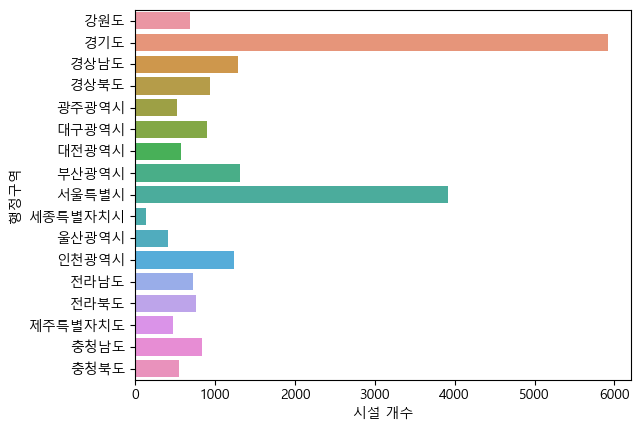

In [87]:
sns.barplot(data=grouped, x='시설 개수', y='행정구역')

<Axes: xlabel='count', ylabel='행정구역'>

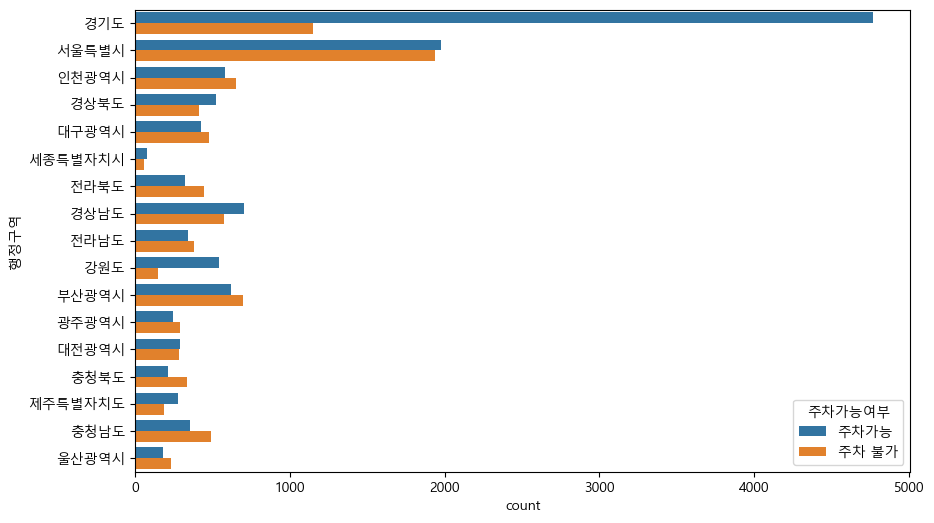

In [88]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='행정구역', hue='주차가능여부')